<a href="https://colab.research.google.com/github/ShoroukGamal/machine-learning-projects/blob/main/Airline_Passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('train_airline.csv')
df2 = pd.read_csv('test.csv')

In [ ]:
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df1.isnull().sum().sort_values(ascending=False).head()

,0
Arrival Delay in Minutes,310
Unnamed: 0,0
Online boarding,0
Departure Delay in Minutes,0
Cleanliness,0


In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent')
df1['Arrival Delay in Minutes'] = imp.fit_transform(df1[['Arrival Delay in Minutes']])

In [ ]:
df1.isnull().sum().sort_values(ascending=False).head()

,0
Unnamed: 0,0
Online boarding,0
Arrival Delay in Minutes,0
Departure Delay in Minutes,0
Cleanliness,0


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df2.isnull().sum().sort_values(ascending=False).head()

,0
Arrival Delay in Minutes,83
Gender,0
Seat comfort,0
Departure Delay in Minutes,0
Cleanliness,0


In [ ]:
df2.shape

(25976, 23)

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2.isnull().any().sum()

0

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df1.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
df2.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

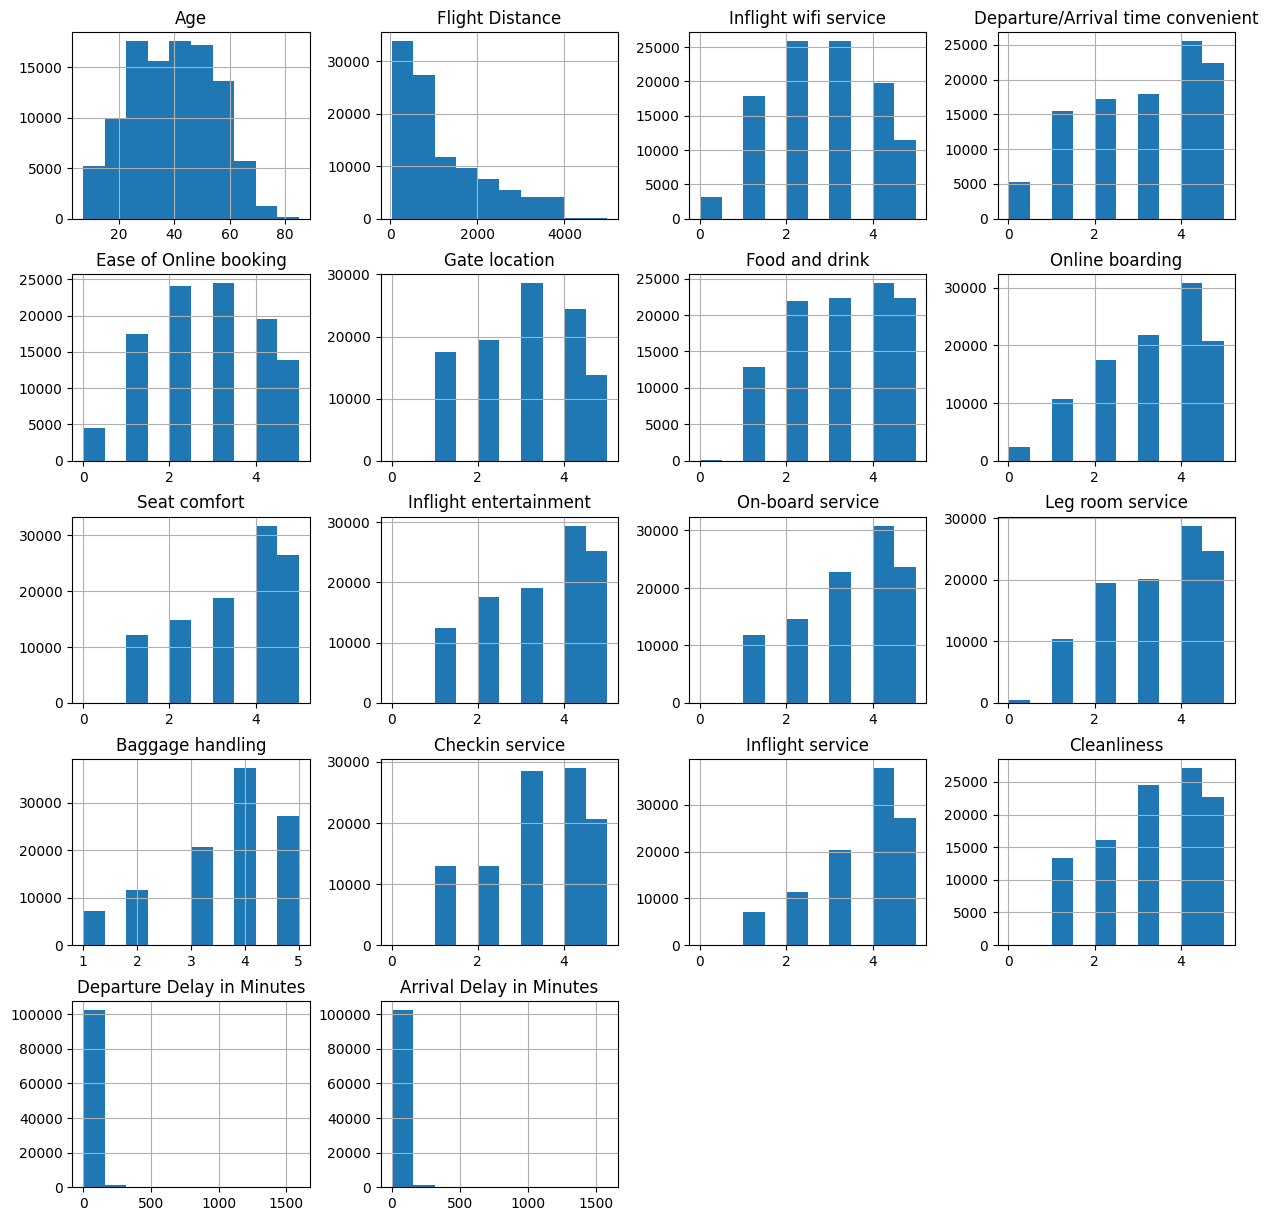

In [ ]:
df1.hist(figsize=(15,15))
plt.show()

In [ ]:
object_name = df1.select_dtypes(include= 'object').columns
object_name[:-1]

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

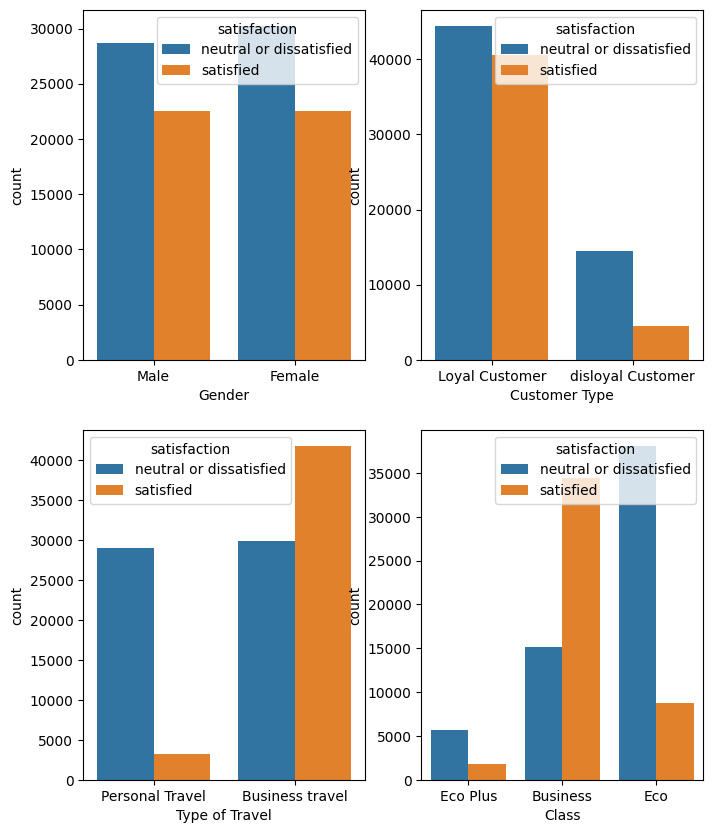

In [ ]:
plt.figure(figsize=(8,10))
for n, col in enumerate(object_name[:-1]):
  plt.subplot(2,2,n+1)
  sns.countplot(x=col, hue= 'satisfaction', data= df1)

plt.show()

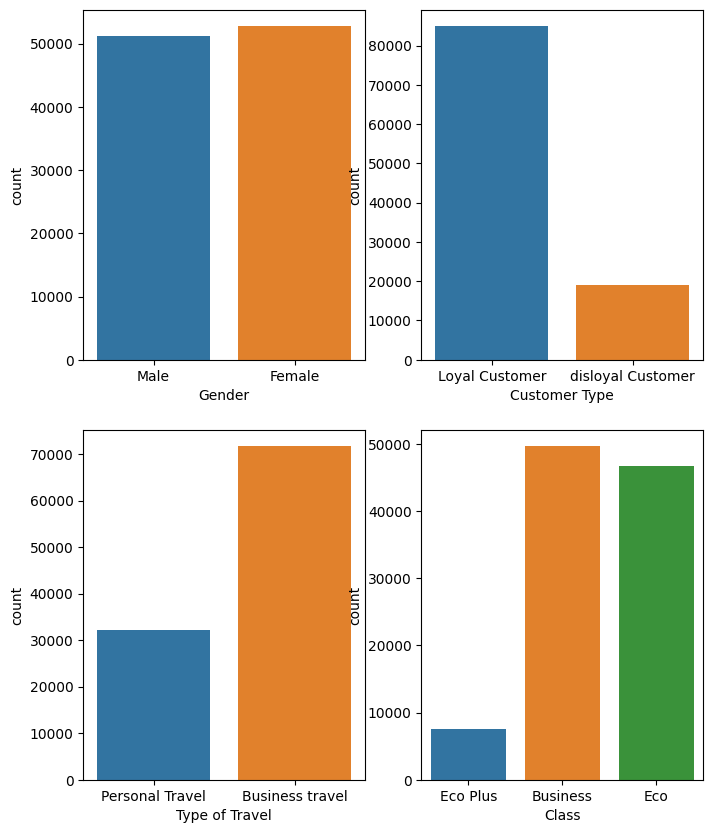

In [ ]:
plt.figure(figsize=(8,10))
for n, col in enumerate(object_name[:-1]):
  plt.subplot(2,2,n+1)
  sns.countplot(x=col, hue= col, data= df1)

plt.show()

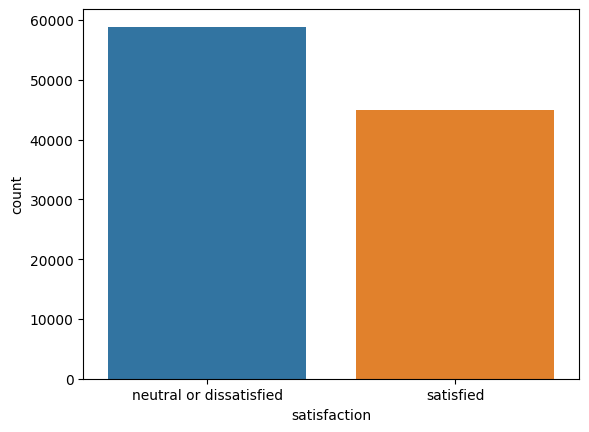

In [ ]:
sns.countplot(x='satisfaction', hue= 'satisfaction', data=df1)
plt.show()

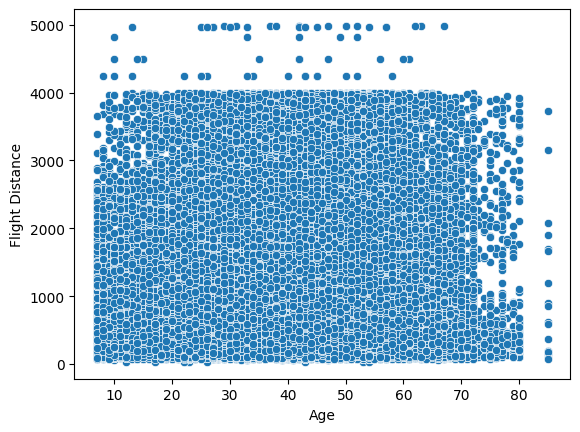

In [ ]:
sns.scatterplot(x='Age', y='Flight Distance', data=df1)
plt.show()

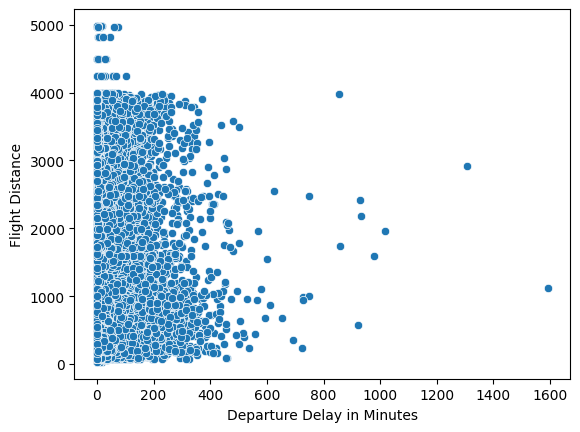

In [ ]:
sns.scatterplot(x= 'Departure Delay in Minutes', y='Flight Distance', data=df1)
plt.show()

In [ ]:
df1['Inflight wifi service'].value_counts()

,count
Inflight wifi service,
3,25868
2,25830
4,19794
1,17840
5,11469
0,3103


In [ ]:
df1.columns[-17:-3]

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

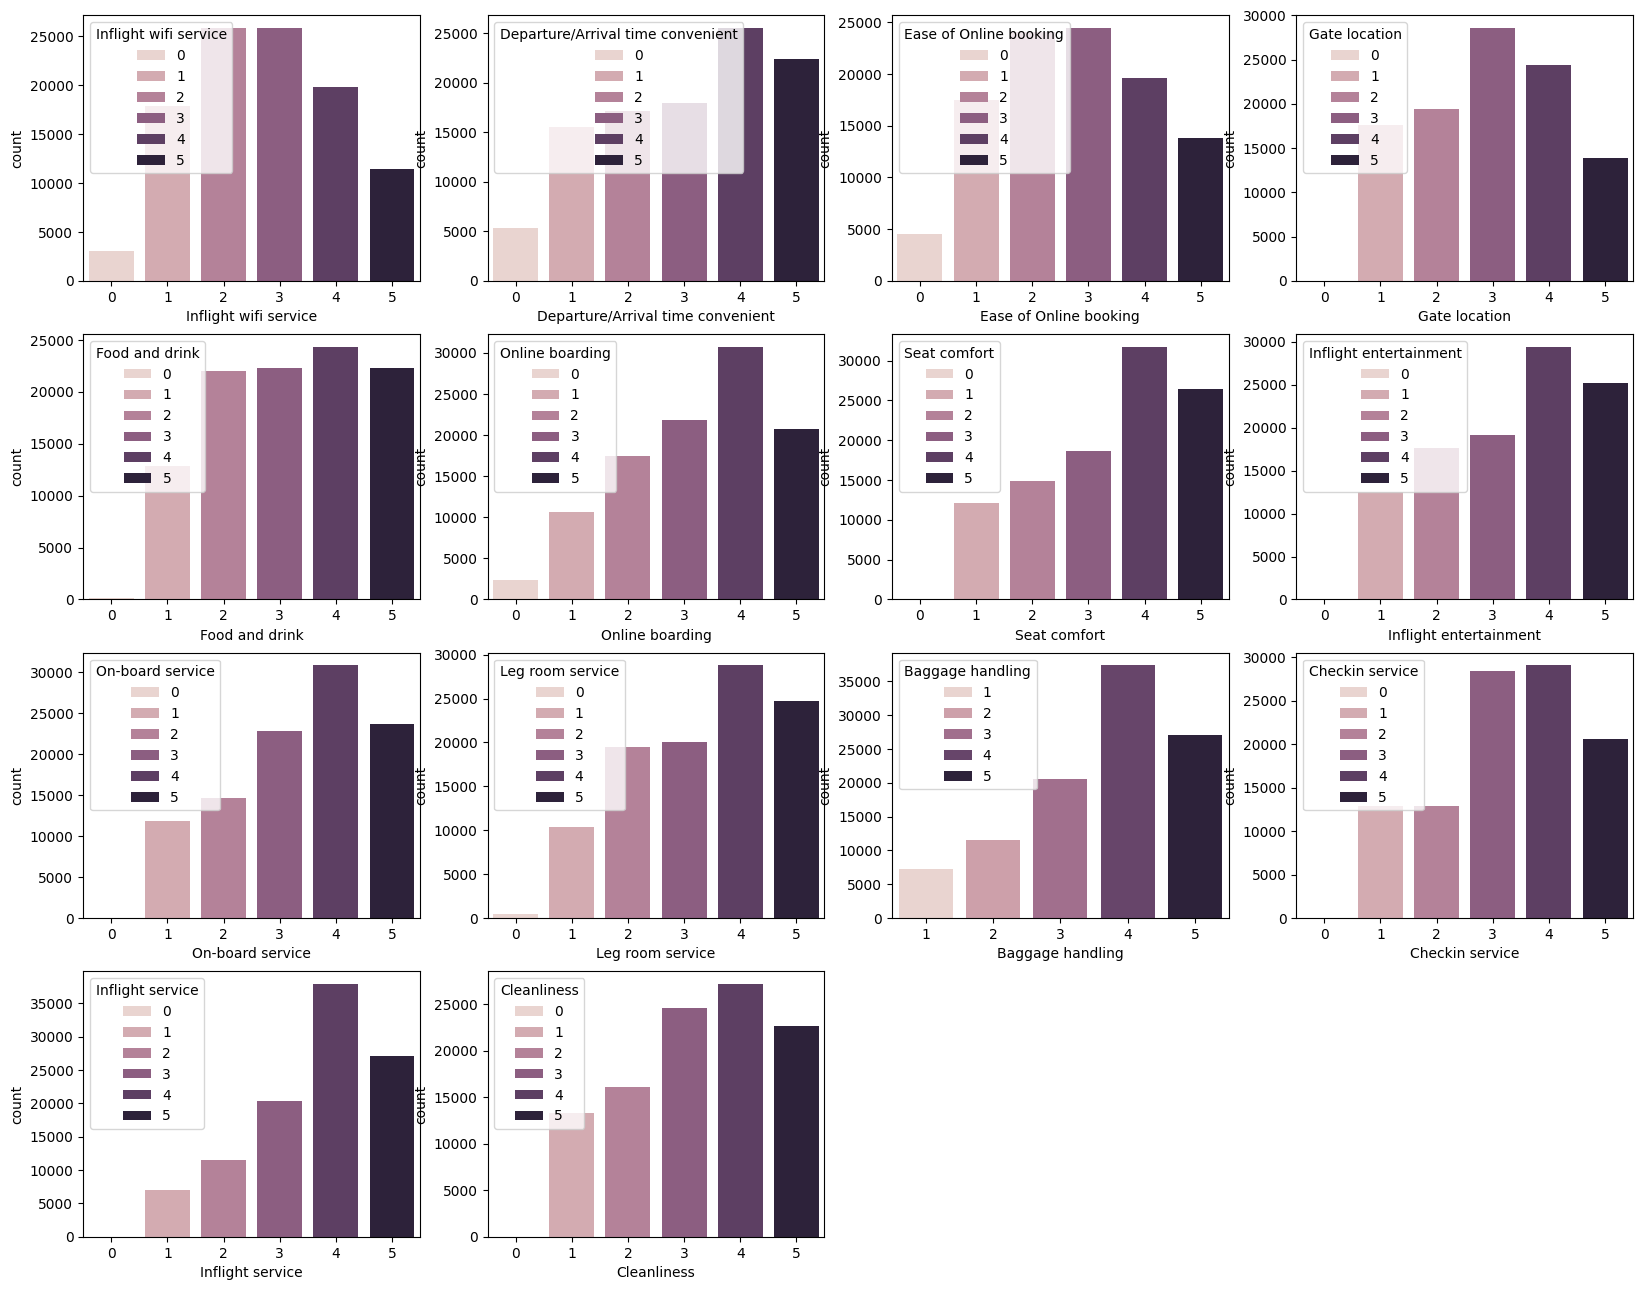

In [ ]:
plt.figure(figsize=(20,20))
#plt.title('    Service  Rank  ')
for n, col in enumerate(df1.columns[-17:-3]):
  plt.subplot(5,4,n+1)
  sns.countplot(x=col, hue=col, data=df1)

plt.show()

In [ ]:
df1.shape

(103904, 23)

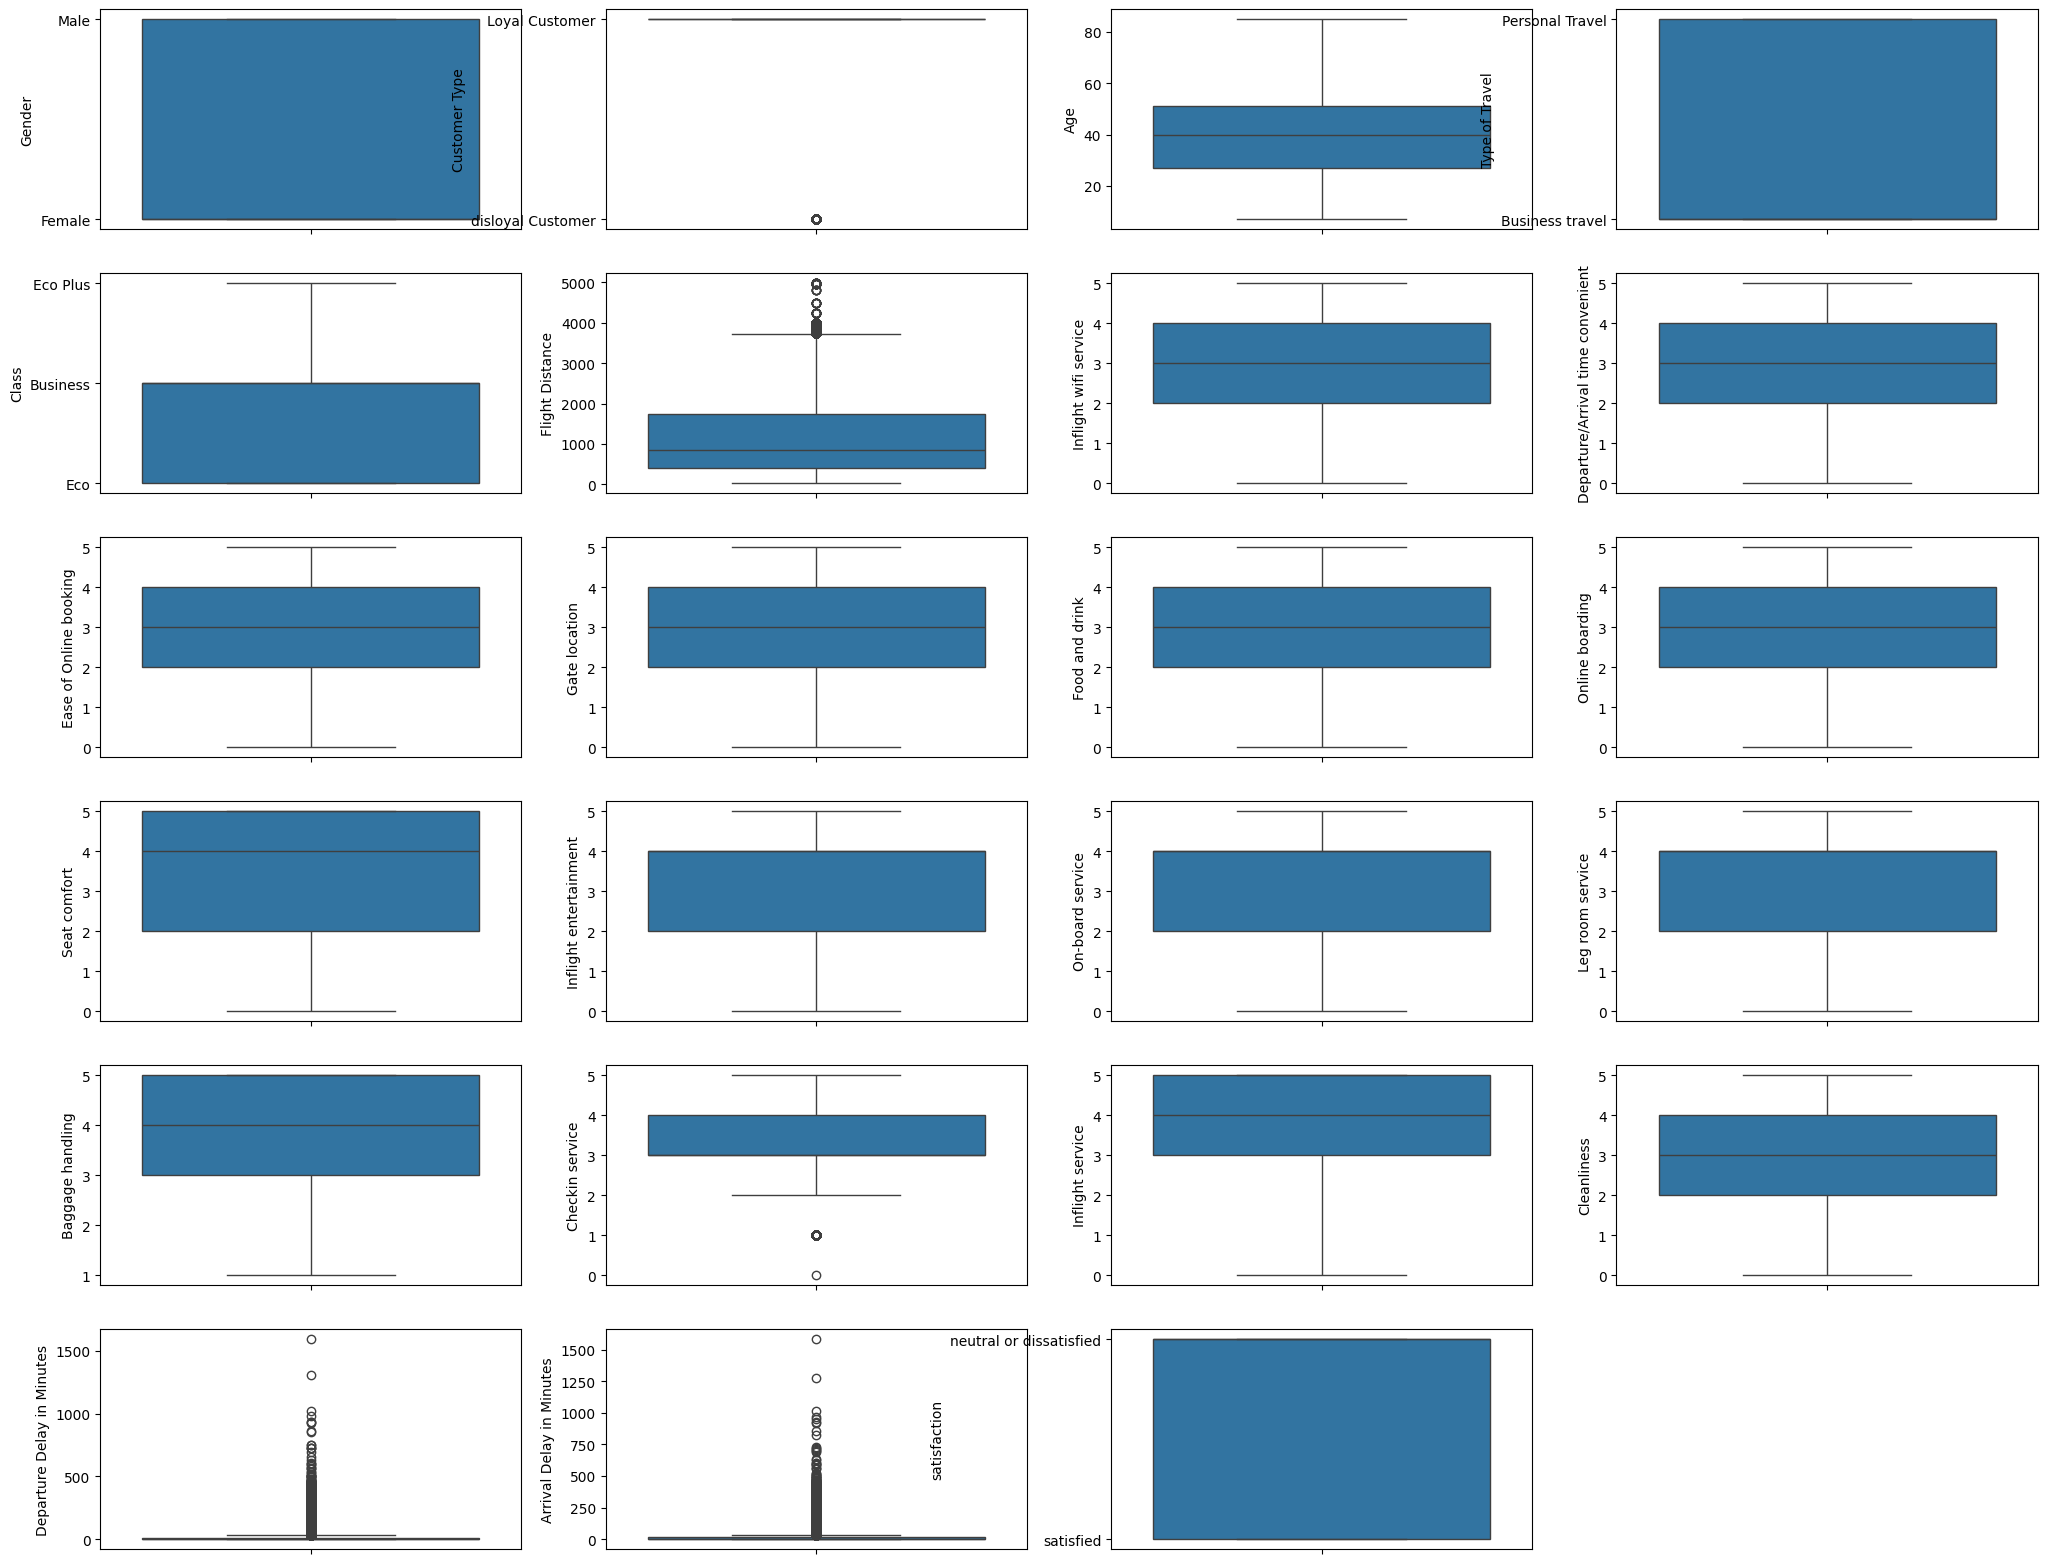

In [ ]:
plt.figure(figsize=(25,20))

for n, col in enumerate(df1.columns):
  plt.subplot(6,4,n+1)
  sns.boxplot(df1[col])

plt.show()

In [ ]:
df1[df1['Flight Distance']>3100].shape

(7487, 23)

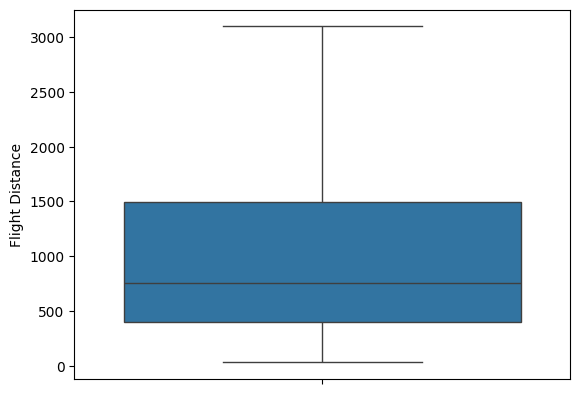

In [ ]:
sns.boxplot(df1[df1['Flight Distance']<3100]['Flight Distance'])
plt.show()

In [ ]:
df1_new = df1[df1['Flight Distance']<3100]

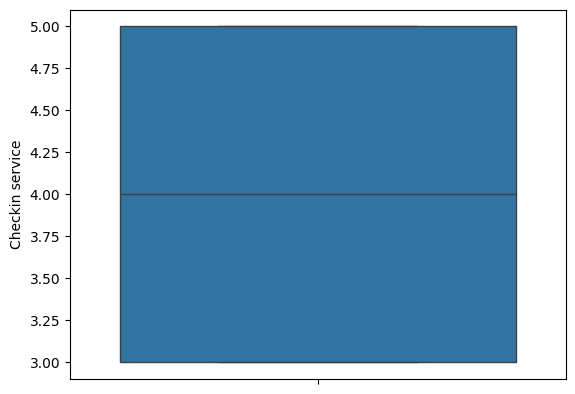

In [ ]:
sns.boxplot(df1_new[df1_new['Checkin service']>2]['Checkin service'])
plt.show()

In [ ]:
df1_new[df1_new['Checkin service']<2].shape

(12186, 23)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in object_name:
  df1_new[col] = le.fit_transform(df1_new[col])
  df2[col] = le.transform(df2[col])

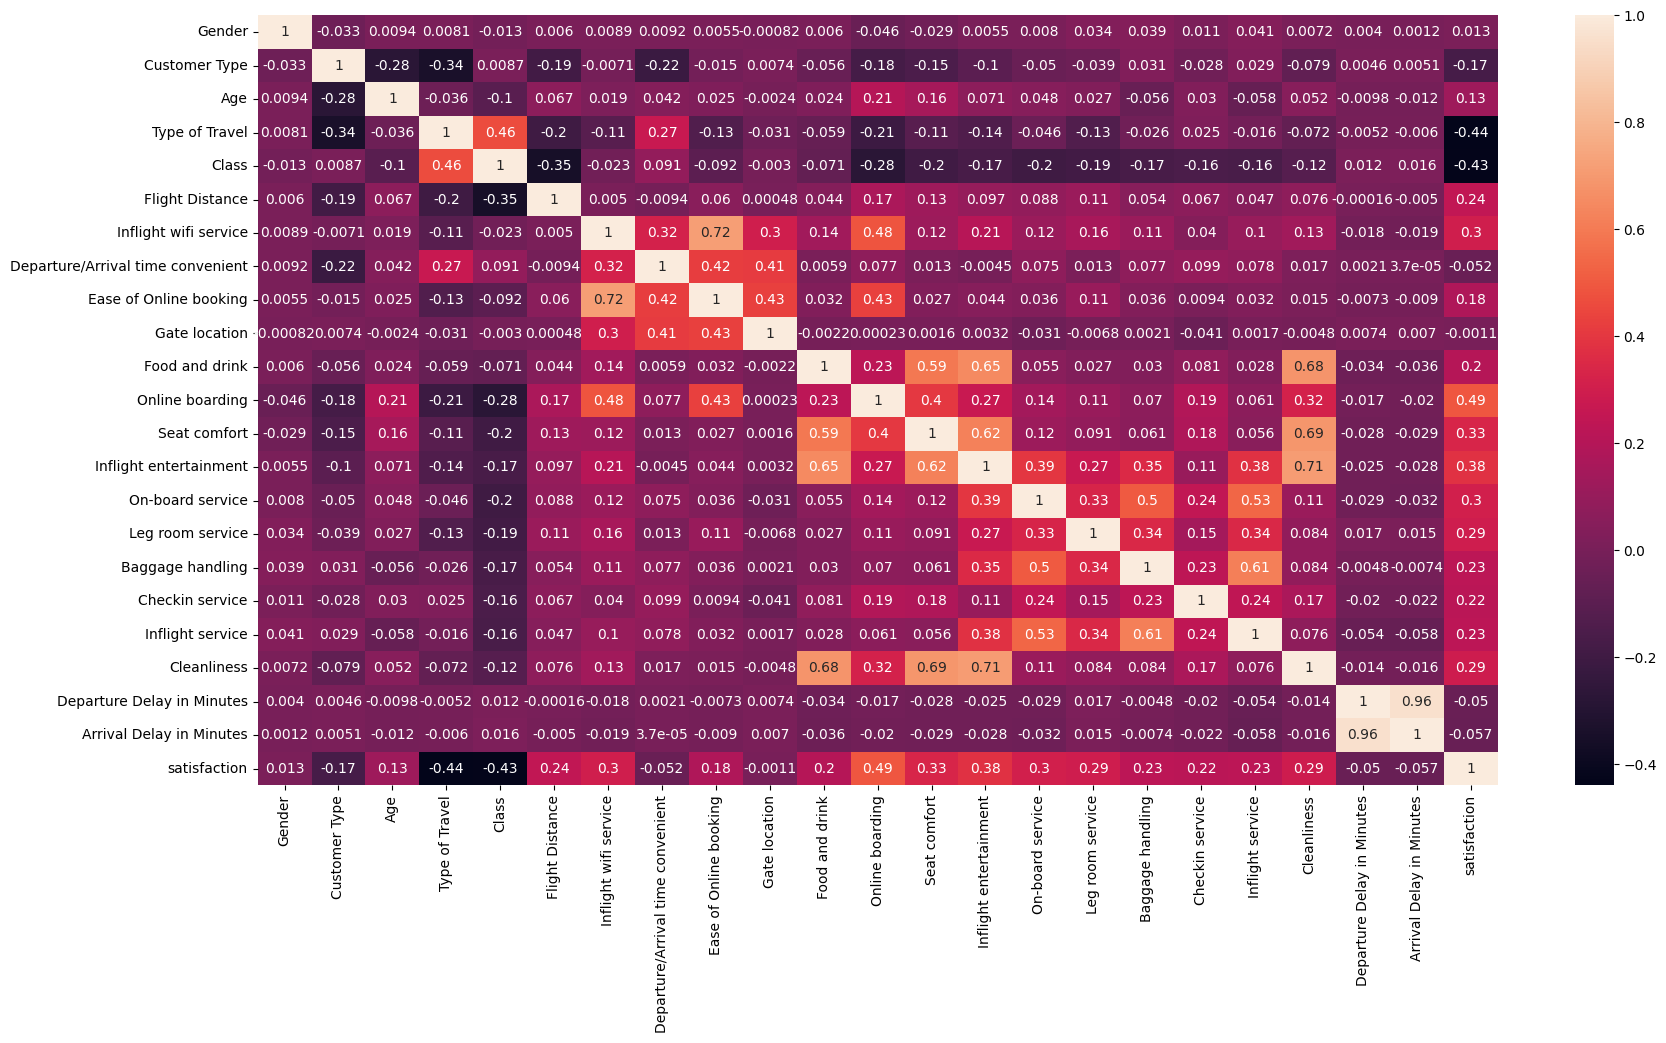

In [ ]:
corr_matrix = df1_new.corr()

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#df1_new.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1, inplace=True)
#df2.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in ['Age', 'Flight Distance']:
  df1_new[col]=scaler.fit_transform(df1_new[[col]])
  df2[col]=scaler.transform(df2[[col]])

In [ ]:
x_train =df1_new.drop('satisfaction',axis=1)
y_train =df1_new['satisfaction']

x_test = df2.drop('satisfaction',axis=1)
y_test = df2['satisfaction']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensamble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC()
}

In [ ]:
results = []
model_name = []

for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel= 'linear',random_state=0,C=0.5)
model.fit(x_train, y_train)


SVC(C=0.5, kernel='linear', random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 y_pred = model.predict(x_test)